# TALLER 02
- Nombre: Freddy Jimenez
- Curso: GR1CC
- Fecha: 09-11-2024

### DIBUJAR LA ECUACION $y(x)=x^3-3x^2+x-1$

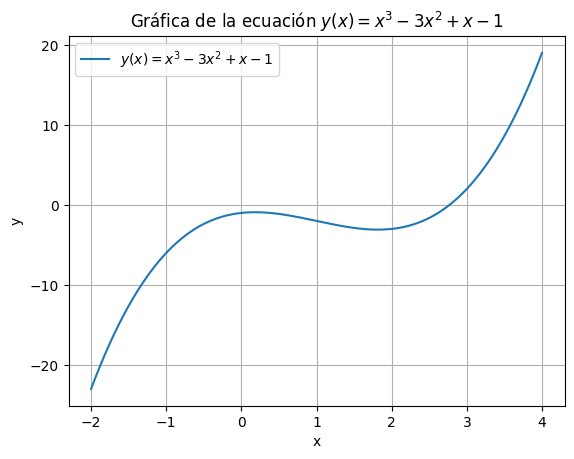

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la función
def y(x):
    return x**3 - 3*x**2 + x - 1

# Crear un rango de valores para x
x = np.linspace(-2, 4, 400)
# Calcular los valores correspondientes de y
y_values = y(x)

# Crear la gráfica
plt.plot(x, y_values, label='$y(x)=x^3-3x^2+x-1$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de la ecuación $y(x)=x^3-3x^2+x-1$')
plt.legend()
plt.grid(True)
plt.show()

### ENCONTRAR LA O LAS RAÍCES USANDO EL METODO DE **NEWTON** CON SCIPY. -

In [1]:
import numpy as np
from scipy.optimize import newton

# Definir la función y(x) y su derivada
def y(x):
    return x**3 - 3*x**2 + x - 1

def dy_dx(x):
    return 3*x**2 - 6*x + 1

# Aplicar el método de Newton con una estimación inicial
initial_guess = 2.0  # Puedes cambiar esta estimación inicial
root = newton(y, initial_guess, fprime=dy_dx)

print("La raíz encontrada es:", root)

La raíz encontrada es: 2.7692923542386314


### RETORNAR LAS ESTIMACIONES VISITADAS POR EL ALGORITMO. -
- Usando el parametro *args=()* u otro metodo.

In [2]:
# Definir la función y su derivada
def y(x):
    return x**3 - 3*x**2 + x - 1

def dy_dx(x):
    return 3*x**2 - 6*x + 1

# Implementar el método de Newton-Raphson que almacena las estimaciones
def newton_raphson_trace(func, deriv, x0, tol=1e-6, max_iter=100):
    x = x0
    estimaciones = [x]  # Lista para almacenar las estimaciones
    for i in range(max_iter):
        fx = func(x)
        dfx = deriv(x)
        if abs(dfx) < 1e-10:
            print("La derivada es cero, el método falla.")
            return None, estimaciones
        x_new = x - fx / dfx
        estimaciones.append(x_new)  # Guardar la nueva estimación
        if abs(x_new - x) < tol:
            return x_new, estimaciones
        x = x_new
    print("Máximo de iteraciones alcanzado.")
    return x, estimaciones

# Estimación inicial
initial_guess = 2.0
root, trace = newton_raphson_trace(y, dy_dx, initial_guess)

print("La raíz encontrada es:", root)
print("Las estimaciones visitadas por el algoritmo son:", trace)

La raíz encontrada es: 2.7692923542386314
Las estimaciones visitadas por el algoritmo son: [2.0, 5.0, 3.8260869565217392, 3.1467190137392356, 2.842326277140092, 2.7728476364392374, 2.7693013974364495, 2.76929235429736, 2.7692923542386314]


### DIBUJAR LA TRAYECTORIA DE LAS RAÍCES. -
- Pruebe 3 estimaciones iniciales diferentes

Máximo de iteraciones alcanzado.


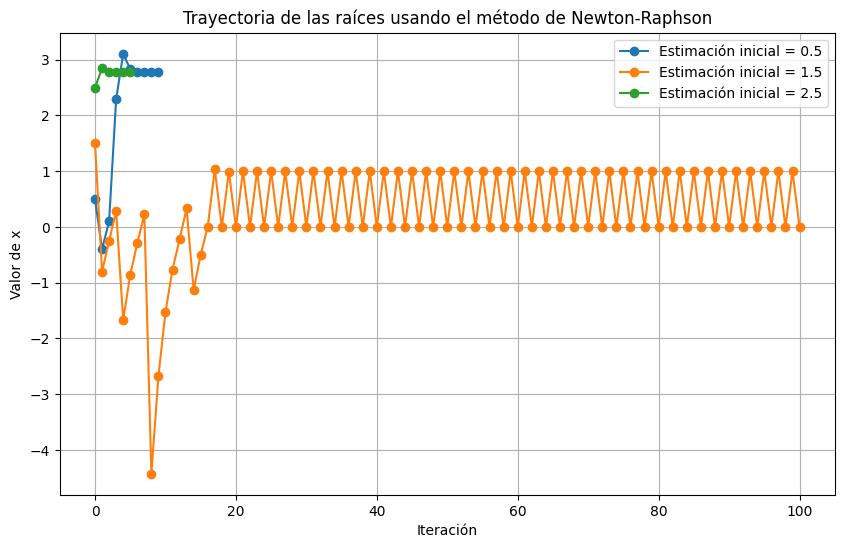

In [4]:
import matplotlib.pyplot as plt

# Definir la función y su derivada
def y(x):
    return x**3 - 3*x**2 + x - 1

def dy_dx(x):
    return 3*x**2 - 6*x + 1

# Implementar el método de Newton-Raphson que almacena las estimaciones
def newton_raphson_trace(func, deriv, x0, tol=1e-6, max_iter=100):
    x = x0
    estimaciones = [x]  # Lista para almacenar las estimaciones
    for i in range(max_iter):
        fx = func(x)
        dfx = deriv(x)
        if abs(dfx) < 1e-10:
            print("La derivada es cero, el método falla.")
            return None, estimaciones
        x_new = x - fx / dfx
        estimaciones.append(x_new)  # Guardar la nueva estimación
        if abs(x_new - x) < tol:
            return x_new, estimaciones
        x = x_new
    print("Máximo de iteraciones alcanzado.")
    return x, estimaciones

# Definir tres estimaciones iniciales diferentes
initial_guesses = [0.5, 1.5, 2.5]

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Ejecutar el método de Newton-Raphson para cada estimación inicial y graficar las trayectorias
for guess in initial_guesses:
    root, trace = newton_raphson_trace(y, dy_dx, guess)
    plt.plot(trace, marker='o', label=f'Estimación inicial = {guess}')

# Personalizar el gráfico
plt.xlabel('Iteración')
plt.ylabel('Valor de x')
plt.title('Trayectoria de las raíces usando el método de Newton-Raphson')
plt.legend()
plt.grid(True)
plt.show()

### ¿Cómo ejecutar el código y evitar que de error para toda estimación?
- Sin ejecutar try except

In [5]:
# Definir la función y su derivada
def y(x):
    return x**3 - 3*x**2 + x - 1

def dy_dx(x):
    return 3*x**2 - 6*x + 1

# Implementar el método de Newton-Raphson con control de errores
def newton_raphson_trace(func, deriv, x0, tol=1e-6, max_iter=100):
    x = x0
    estimaciones = [x]  # Lista para almacenar las estimaciones
    for i in range(max_iter):
        fx = func(x)
        dfx = deriv(x)
        
        # Verificar que la derivada no sea demasiado pequeña
        if abs(dfx) < 1e-10:
            print(f"Detenido: La derivada es muy pequeña en x = {x}.")
            return None, estimaciones  # Devuelve la lista de estimaciones hasta el momento
        
        # Calcular la siguiente estimación
        x_new = x - fx / dfx
        estimaciones.append(x_new)  # Guardar la nueva estimación
        
        # Verificar la convergencia
        if abs(x_new - x) < tol:
            return x_new, estimaciones
        
        # Actualizar x para la siguiente iteración
        x = x_new
    
    print("Máximo de iteraciones alcanzado sin convergencia.")
    return None, estimaciones

# Ejemplo de uso con diferentes estimaciones iniciales
initial_guesses = [0.5, 1.5, 2.5]

# Ejecutar el método para cada estimación inicial
for guess in initial_guesses:
    root, trace = newton_raphson_trace(y, dy_dx, guess)
    print(f"Estimación inicial = {guess}")
    print("Raíz encontrada:", root)
    print("Trayectoria de las estimaciones:", trace)
    print()

Estimación inicial = 0.5
Raíz encontrada: 2.7692923542386314
Trayectoria de las estimaciones: [0.5, -0.4, 0.10103092783505152, 2.2887793276654564, 3.105767299013572, 2.8291999504602514, 2.7717158120621077, 2.76929656115579, 2.769292354251341, 2.7692923542386314]

Máximo de iteraciones alcanzado sin convergencia.
Estimación inicial = 1.5
Raíz encontrada: None
Trayectoria de las estimaciones: [1.5, -0.7999999999999998, -0.2518134715025906, 0.28796852779561877, -1.6679050305415781, -0.8590660466461232, -0.29658733173320506, 0.22472438620257396, -4.4258304446841805, -2.677861014828986, -1.5271747309973847, -0.7645954714951503, -0.22445244301055445, 0.33078348182790374, -1.1335768942888578, -0.4948568423120613, 0.004886647721338899, 1.0300559269683924, -0.0013840648640377484, 0.991752648314653, -0.00010147759326428751, 0.9993914432001892, -5.552870023795009e-07, 0.999996668287236, -1.665079185642071e-11, 0.9999999999000954, 1.1102230246251565e-16, 1.0000000000000009, 0.0, 1.0, 0.0, 1.0, 0.0